In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sb
import matplotlib.pyplot as plt
import random

In [2]:
folder = 'Open University Dataset/'
os.listdir(folder)

['assessments.csv',
 'courses.csv',
 'studentAssessment.csv',
 'studentInfo.csv',
 'studentRegistration.csv',
 'studentVle.csv',
 'vle.csv']

In [3]:
table = []
for file in os.listdir(folder):
    table.append(pd.read_csv(folder+file))

In [4]:
student_assessment = table[2]
assessment = table[0]
student_info  = table[3]

In [5]:
#Dropping 'assessment_submission_date' as it not required 
assessment = assessment.drop(['assessment_submission_date'],axis = 1)

#Dropping 'is_banked' , 'date_submitted' as it is not required
student_assessment = student_assessment.drop(['is_banked','date_submitted'],axis = 1)



In [6]:
#Splitting internal assessments and final assessments
internals = assessment[assessment['assessment_type'] != 'Exam']
finals = assessment[assessment['assessment_type'] == 'Exam']

In [7]:
assessment_per_presentation = internals.groupby(['code_module','code_presentation']).agg(assessment_per_presentation = ('id_assessment','count')).reset_index()

In [8]:
finals

,code_module,code_presentation,id_assessment,assessment_type,weight
5,AAA,2013J,1757,Exam,100.0
11,AAA,2014J,1763,Exam,100.0
23,BBB,2013B,14990,Exam,100.0
35,BBB,2013J,15002,Exam,100.0
47,BBB,2014B,15014,Exam,100.0
53,BBB,2014J,15025,Exam,100.0
62,CCC,2014B,24290,Exam,100.0
63,CCC,2014B,40087,Exam,100.0
72,CCC,2014J,24299,Exam,100.0
73,CCC,2014J,40088,Exam,100.0


In [9]:
internals

,code_module,code_presentation,id_assessment,assessment_type,weight
0,AAA,2013J,1752,TMA,10.0
1,AAA,2013J,1753,TMA,20.0
2,AAA,2013J,1754,TMA,20.0
3,AAA,2013J,1755,TMA,20.0
4,AAA,2013J,1756,TMA,30.0
...,...,...,...,...,...
200,GGG,2014J,37442,CMA,0.0
201,GGG,2014J,37443,CMA,0.0
202,GGG,2014J,37435,TMA,0.0
203,GGG,2014J,37436,TMA,0.0


In [10]:
assessment_per_presentation

,code_module,code_presentation,assessment_per_presentation
0,AAA,2013J,5
1,AAA,2014J,5
2,BBB,2013B,11
3,BBB,2013J,11
4,BBB,2014B,11
5,BBB,2014J,5
6,CCC,2014B,8
7,CCC,2014J,8
8,DDD,2013B,13
9,DDD,2013J,6


In [11]:
#misa is the merge of tables 'internals' and 'student_assessment'
misa_internals = pd.merge(internals,student_assessment,on=['id_assessment'],how = 'inner')
misa_internals

,code_module,code_presentation,id_assessment,assessment_type,weight,id_student,score
0,AAA,2013J,1752,TMA,10.0,11391,78.0
1,AAA,2013J,1752,TMA,10.0,28400,70.0
2,AAA,2013J,1752,TMA,10.0,31604,72.0
3,AAA,2013J,1752,TMA,10.0,32885,69.0
4,AAA,2013J,1752,TMA,10.0,38053,79.0
...,...,...,...,...,...,...,...
168948,GGG,2014J,37437,TMA,0.0,652462,60.0
168949,GGG,2014J,37437,TMA,0.0,652539,75.0
168950,GGG,2014J,37437,TMA,0.0,653157,70.0
168951,GGG,2014J,37437,TMA,0.0,653252,70.0


In [12]:
misa_finals = pd.merge(student_assessment,finals,on=['id_assessment'],how='inner')
misa_finals = misa_finals.drop(['id_assessment','assessment_type','weight'],axis=1)
misa_finals

,id_student,score,code_module,code_presentation
0,558914,32.0,CCC,2014B
1,559706,78.0,CCC,2014B
2,559770,54.0,CCC,2014B
3,560114,64.0,CCC,2014B
4,560311,100.0,CCC,2014B
...,...,...,...,...
4954,652680,91.0,DDD,2014J
4955,652732,47.0,DDD,2014J
4956,652965,87.0,DDD,2014J
4957,653051,27.0,DDD,2014J


In [13]:
#Creating 'weighted_grade' attribute to combine weights and their respective scores
misa_internals['partial_weighted_grade'] = (misa_internals['weight']/100)*(misa_internals['score'])


misa_internals['has_passed'] = (misa_internals['score']>40).map({True:1,False:0})


misa_internals = misa_internals.groupby(['code_module','code_presentation','id_student']).agg(weighted_grade=('partial_weighted_grade',sum),
                                                                          pass_count = ('has_passed',sum)).reset_index()



misa_internals = pd.merge(misa_internals,assessment_per_presentation,on=['code_module','code_presentation'],how = 'inner')
misa_internals['pass_rate'] = misa_internals['pass_count']/misa_internals['assessment_per_presentation']
misa_internals =misa_internals.drop(['pass_count','assessment_per_presentation'],axis=1)
misa_internals

,code_module,code_presentation,id_student,weighted_grade,pass_rate
0,AAA,2013J,11391,82.4,1.000000
1,AAA,2013J,28400,65.4,1.000000
2,AAA,2013J,31604,76.3,1.000000
3,AAA,2013J,32885,55.0,0.600000
4,AAA,2013J,38053,66.9,1.000000
...,...,...,...,...,...
25834,GGG,2014J,2620947,0.0,1.000000
25835,GGG,2014J,2645731,0.0,1.000000
25836,GGG,2014J,2648187,0.0,1.000000
25837,GGG,2014J,2679821,0.0,0.222222


In [14]:
# misa = pd.merge(misa_internals,misa_finals,on=['code_module','code_presentation','id_student'])
# misa['exam_score'] = misa['score']
# misa = misa.drop(['score'],axis = 1)
misa = misa_internals
misa

,code_module,code_presentation,id_student,weighted_grade,pass_rate
0,AAA,2013J,11391,82.4,1.000000
1,AAA,2013J,28400,65.4,1.000000
2,AAA,2013J,31604,76.3,1.000000
3,AAA,2013J,32885,55.0,0.600000
4,AAA,2013J,38053,66.9,1.000000
...,...,...,...,...,...
25834,GGG,2014J,2620947,0.0,1.000000
25835,GGG,2014J,2645731,0.0,1.000000
25836,GGG,2014J,2648187,0.0,1.000000
25837,GGG,2014J,2679821,0.0,0.222222


In [15]:
#student_info contains 'studentInfo.csv' 
#diregarding students who withdrew the course
student_info = student_info[student_info['final_result']!='Withdrawn']

In [16]:
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass


In [17]:
#student_vle contains 'studentVle.csv'.
student_vle = table[5]
#Dropping 'student_interaction_date' as it is not required.
student_vle = student_vle.drop(['student_interaction_date'],axis = 1)
#Creating new attributes 'sites_visited' and 'tot_clicks' by adding their corresponding values.
student_vle = student_vle.groupby(['code_module','code_presentation','id_student']).agg({'id_site':'count','sum_click':sum}).reset_index()
student_vle.rename(columns = {'id_site':'sites_visited', 'sum_click':'tot_clicks'}, inplace = True)
student_vle['avg_click_per_site'] = student_vle['tot_clicks']/ student_vle['sites_visited']
student_vle = student_vle.drop(['sites_visited','tot_clicks'],axis=1)
student_vle

,code_module,code_presentation,id_student,avg_click_per_site
0,AAA,2013J,11391,4.765306
1,AAA,2013J,28400,3.337209
2,AAA,2013J,30268,3.697368
3,AAA,2013J,31604,3.254902
4,AAA,2013J,32885,2.937500
...,...,...,...,...
4132,BBB,2013J,2680344,2.802667
4133,BBB,2013J,2680885,2.098039
4134,BBB,2013J,2691100,2.706294
4135,BBB,2013J,2691566,2.588235


In [18]:
#sisv a merge of tables 'student_info' and 'student_vle'
sisv = pd.merge(student_info,student_vle,on=['code_module','code_presentation','id_student'],how='inner')
sisv.info()
print('\n')
sisv.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 3378
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           3379 non-null   object 
 1   code_presentation     3379 non-null   object 
 2   id_student            3379 non-null   int64  
 3   gender                3379 non-null   object 
 4   region                3379 non-null   object 
 5   highest_education     3379 non-null   object 
 6   imd_band              3329 non-null   object 
 7   age_band              3379 non-null   object 
 8   num_of_prev_attempts  3379 non-null   int64  
 9   studied_credits       3379 non-null   int64  
 10  disability            3379 non-null   object 
 11  final_result          3379 non-null   object 
 12  avg_click_per_site    3379 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 369.6+ KB




,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,avg_click_per_site
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,4.765306
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,3.337209
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,3.254902
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,2.937500
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,3.381743


In [19]:
#Merging tables 'misa' and 'sisv' and selecting required attributes to make 'misa_sisv_woa'
misa_sisv = pd.merge(sisv,misa,on=['code_module','code_presentation','id_student'])
misa_sisv
misa_sisv_woa = misa_sisv[['code_module','code_presentation','avg_click_per_site','weighted_grade'
                           ,'final_result','pass_rate']]
misa_sisv_woa.info()
misa_sisv_woa.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3257 entries, 0 to 3256
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code_module         3257 non-null   object 
 1   code_presentation   3257 non-null   object 
 2   avg_click_per_site  3257 non-null   float64
 3   weighted_grade      3257 non-null   float64
 4   final_result        3257 non-null   object 
 5   pass_rate           3257 non-null   float64
dtypes: float64(3), object(3)
memory usage: 178.1+ KB


,code_module,code_presentation,avg_click_per_site,weighted_grade,final_result,pass_rate
0,AAA,2013J,4.765306,82.4,Pass,1.0
1,AAA,2013J,3.337209,65.4,Pass,1.0
2,AAA,2013J,3.254902,76.3,Pass,1.0
3,AAA,2013J,2.937500,55.0,Pass,0.6
4,AAA,2013J,3.381743,66.9,Pass,1.0


In [58]:
misa_sisv_woa

,code_module,code_presentation,avg_click_per_site,weighted_grade,final_result,pass_rate
0,0,1,4.765306,82.40,2,1.000000
1,0,1,3.337209,65.40,2,1.000000
2,0,1,3.254902,76.30,2,1.000000
3,0,1,2.937500,55.00,2,0.600000
4,0,1,3.381743,66.90,2,1.000000
...,...,...,...,...,...,...
3252,1,1,1.500000,2.30,1,0.090909
3253,1,1,2.802667,78.28,2,1.000000
3254,1,1,2.098039,70.31,0,0.909091
3255,1,1,2.706294,62.23,2,0.818182


In [20]:
def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

In [21]:
def Scatter(data,ft1,ft2,col,j):
    fig = plt.figure(figsize=(10,5))
    x = jitter(data[ft1],j)
    y = jitter(data[ft2],j)
    plt.scatter(x, y, c=col, marker="o")
    plt.xlabel(ft1)
    plt.ylabel(ft2)
    plt.show()    

# Modelling

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [23]:
LR = LinearRegression()
labelEncoder = LabelEncoder()
MinMax_Scaler = MinMaxScaler()
#Label Encoding
for col in misa_sisv_woa.columns.tolist():
    if misa_sisv_woa[col].dtype == 'object':
        misa_sisv_woa[col] = labelEncoder.fit_transform(misa_sisv_woa[col])
        
misa_sisv_woa

C:\Users\aadit\AppData\Local\Temp\ipykernel_6288\499711599.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misa_sisv_woa[col] = labelEncoder.fit_transform(misa_sisv_woa[col])


,code_module,code_presentation,avg_click_per_site,weighted_grade,final_result,pass_rate
0,0,1,4.765306,82.40,2,1.000000
1,0,1,3.337209,65.40,2,1.000000
2,0,1,3.254902,76.30,2,1.000000
3,0,1,2.937500,55.00,2,0.600000
4,0,1,3.381743,66.90,2,1.000000
...,...,...,...,...,...,...
3252,1,1,1.500000,2.30,1,0.090909
3253,1,1,2.802667,78.28,2,1.000000
3254,1,1,2.098039,70.31,0,0.909091
3255,1,1,2.706294,62.23,2,0.818182


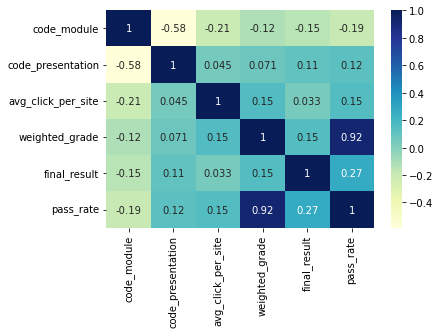

In [24]:
sb.heatmap(misa_sisv_woa.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [25]:
from itertools import cycle
cycol = cycle('bgrcmk')

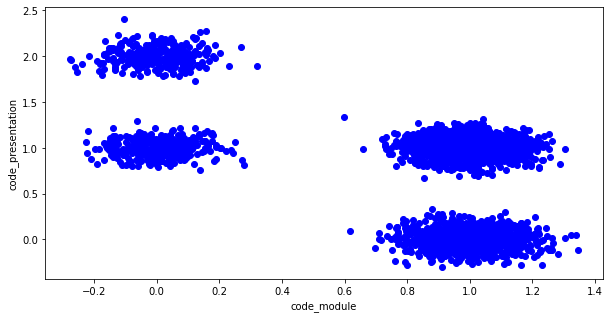

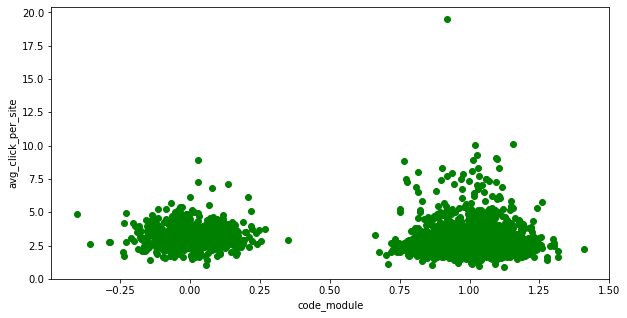

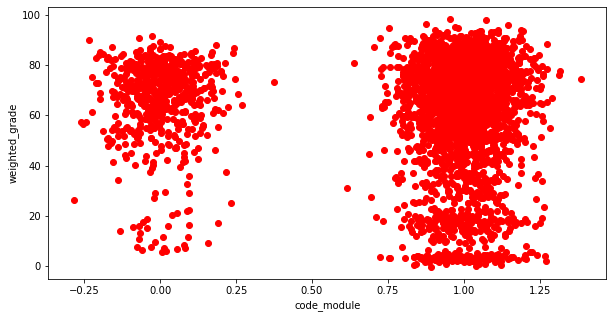

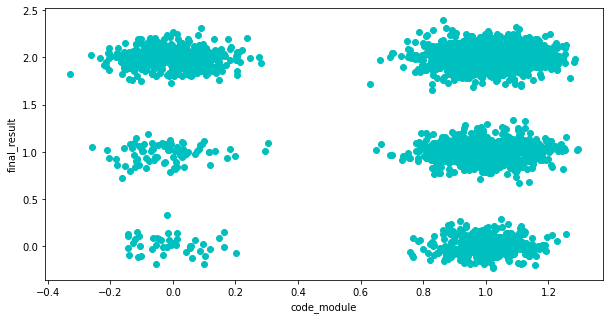

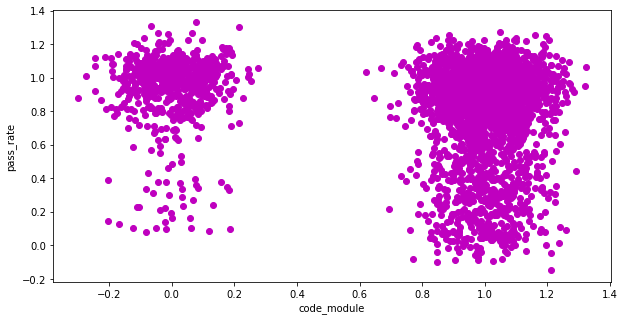

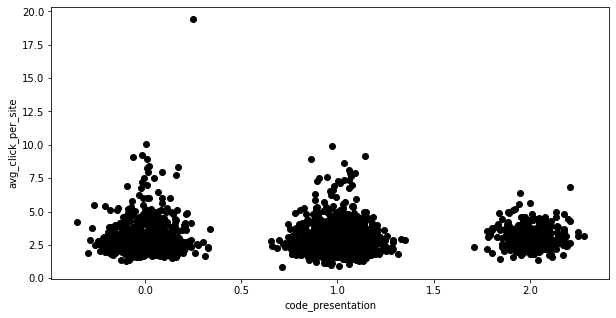

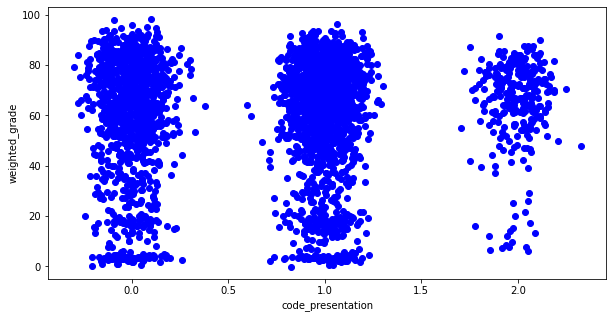

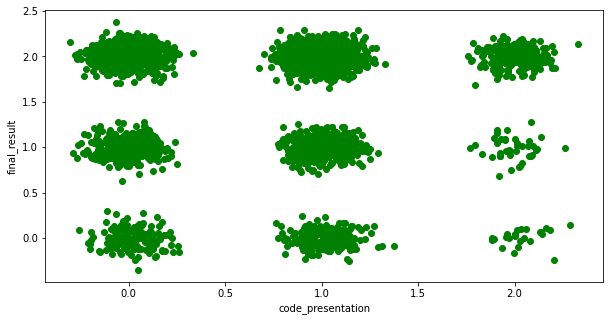

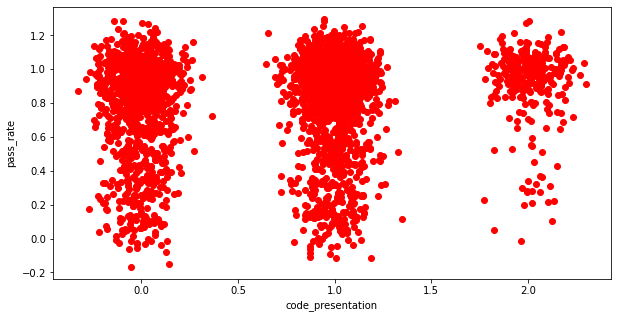

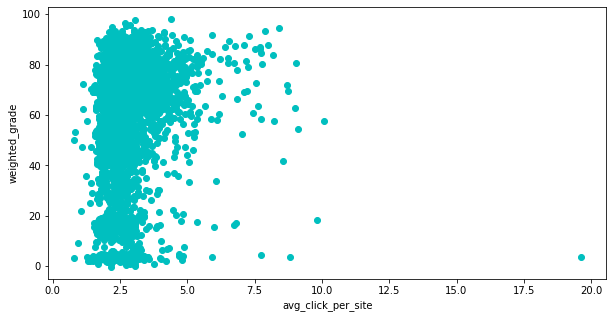

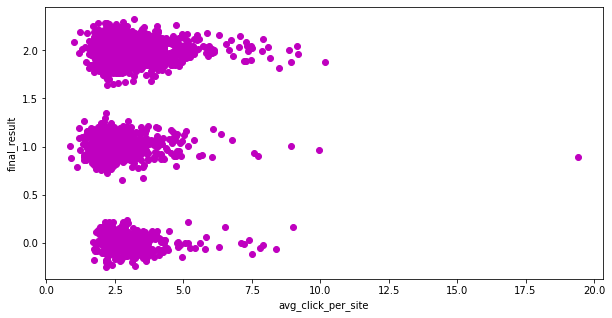

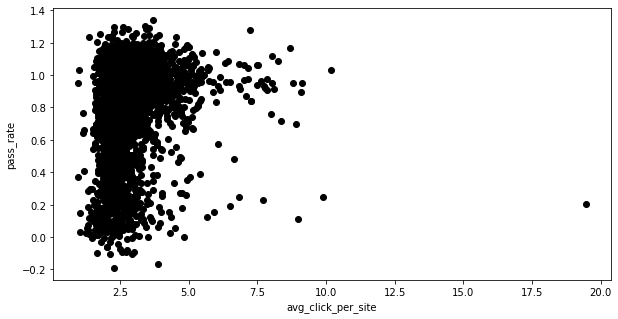

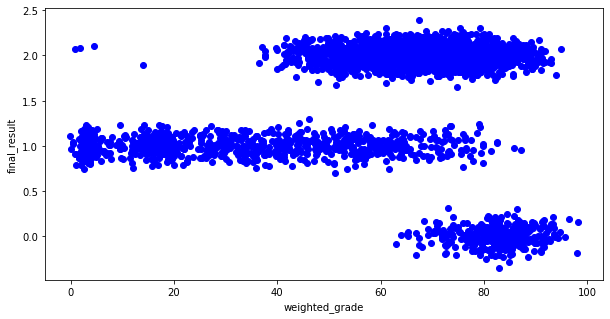

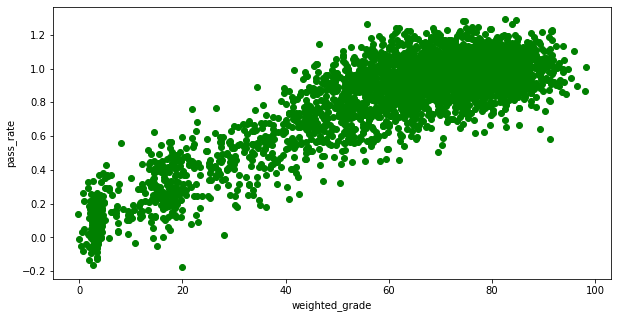

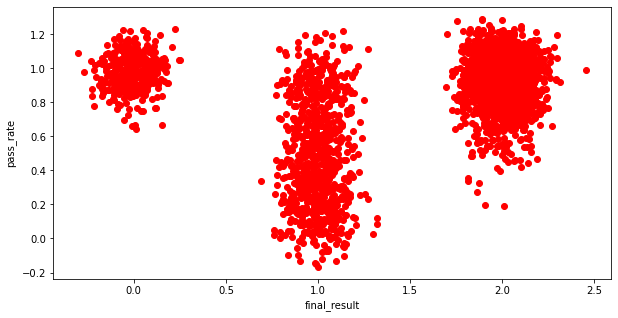

In [26]:
#Pair plot for each 2 columns
cols = list(misa_sisv_woa.columns)
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        Scatter(misa_sisv_woa,cols[i],cols[j],col =next(cycol),j = 0)


In [27]:
classification_table = dict(zip(labelEncoder.inverse_transform(misa_sisv_woa['final_result']),misa_sisv_woa['final_result'])) 

In [28]:
#Normalisation
misa_sisv_woa_norm = MinMax_Scaler.fit_transform(misa_sisv_woa[['code_module','code_presentation','avg_click_per_site','weighted_grade','final_result']])
misa_sisv_woa_norm = pd.DataFrame(misa_sisv_woa_norm,columns = ['code_module','code_presentation','avg_click_per_site','weighted_grade','final_result'])
misa_sisv_woa_norm

,code_module,code_presentation,avg_click_per_site,weighted_grade,final_result
0,0.0,0.5,0.204330,0.839702,1.0
1,0.0,0.5,0.126832,0.666463,1.0
2,0.0,0.5,0.122366,0.777540,1.0
3,0.0,0.5,0.105142,0.560481,1.0
4,0.0,0.5,0.129249,0.681749,1.0
...,...,...,...,...,...
3252,1.0,0.5,0.027133,0.023438,0.5
3253,1.0,0.5,0.097825,0.797717,1.0
3254,1.0,0.5,0.059587,0.716499,0.0
3255,1.0,0.5,0.092595,0.634159,1.0


In [29]:
#Splitting TRAIN and TEST data
X = misa_sisv_woa_norm.drop(['final_result'],axis=1)
y = misa_sisv_woa[['final_result']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3)

In [30]:
def Plot_CFM_HeatMap(y_test,y_pred,tabel):
    print(tabel)
    sb.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    plt.ylabel('y true')
    plt.xlabel('y pred')
    plt.show()

In [31]:
classification_table_binary = {'Pass':1,'Fail':0}

## Linear Regression

## Pass or Fail  prediction ( Binary Classification )

In [32]:
LR = LinearRegression()
StudentPredictionModel_lr = LR.fit(X_train, y_train['final_result'].map({2: 1, 1:0, 0 : 1}))
StudentPredictionModel_lr.score(X_test,y_test['final_result'].map({2: 1, 1:0, 0 : 1}))

0.551535151715473

## Pass or Fail or Distinction prediction ( Multi Class Classification )

In [33]:
LR = LinearRegression()
StudentPredictionModel_lr = LR.fit(X_train, y_train)
StudentPredictionModel_lr.score(X_test,y_test)

0.016011010142234272

## Logistic Regression

## Pass or Fail or Distinction prediction ( Multi Class Classification )

In [34]:
LOR = LogisticRegression(max_iter=10000,multi_class='multinomial', solver='lbfgs')
StudentPredictionModel_lor = LOR.fit(X_train,y_train.values.ravel())
StudentPredictionModel_lor.score(X_test,y_test)

0.7832310838445807

In [35]:
y_pred = StudentPredictionModel_lor.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.11      0.19       113
           1       0.90      0.67      0.77       267
           2       0.75      0.96      0.84       598

    accuracy                           0.78       978
   macro avg       0.82      0.58      0.60       978
weighted avg       0.80      0.78      0.75       978



{'Pass': 2, 'Fail': 1, 'Distinction': 0}


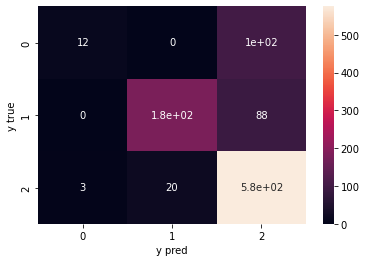

In [36]:
Plot_CFM_HeatMap(y_test,y_pred,classification_table)

## Pass or Fail prediction ( Binary Classification )

In [37]:
LOR = LogisticRegression(max_iter=10000)
StudentPredictionModel_lor = LOR.fit(X_train,y_train['final_result'].map({2: 1, 1:0, 0 : 1}).values.ravel())
StudentPredictionModel_lor.score(X_test,y_test['final_result'].map({2: 1, 1:0, 0 : 1}))

0.8895705521472392

In [38]:
y_pred = StudentPredictionModel_lor.predict(X_test)
print(classification_report(y_test['final_result'].map({2: 1, 1:0, 0 : 1}),y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       267
           1       0.89      0.97      0.93       711

    accuracy                           0.89       978
   macro avg       0.89      0.82      0.85       978
weighted avg       0.89      0.89      0.88       978



{'Pass': 1, 'Fail': 0}


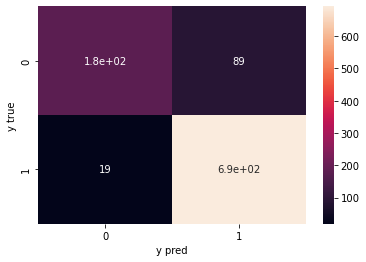

In [39]:
Plot_CFM_HeatMap(y_test['final_result'].map({2: 1, 1:0, 0 : 1}),y_pred,classification_table_binary)

## Random Forest Classifier

## Pass or Fail Or Distinction Prediction ( Multi Class Classification )

In [40]:
RFC = RandomForestClassifier(n_estimators=1000,max_depth=10)
StudentPredictionModel_RFC = RFC.fit(X_train,y_train.values.ravel())
StudentPredictionModel_RFC.score(X_test,y_test)

0.7709611451942741

In [41]:
y_pred = StudentPredictionModel_RFC.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.35      0.39       113
           1       0.91      0.68      0.78       267
           2       0.77      0.89      0.83       598

    accuracy                           0.77       978
   macro avg       0.71      0.64      0.67       978
weighted avg       0.77      0.77      0.76       978



{'Pass': 2, 'Fail': 1, 'Distinction': 0}


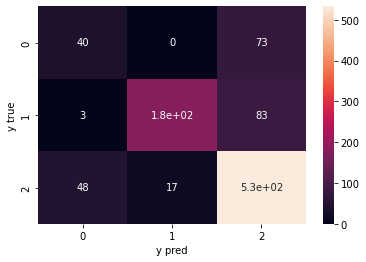

In [42]:
Plot_CFM_HeatMap(y_test,y_pred,classification_table)

## Pass or Fail Prediction ( Binary Classification )

In [43]:
RFC = RandomForestClassifier(n_estimators=2000,max_depth=10)
StudentPredictionModel_RFC = RFC.fit(X_train,y_train['final_result'].map({2: 1, 1:0, 0 : 1}).values.ravel())
StudentPredictionModel_RFC.score(X_test,y_test['final_result'].map({2: 1, 1:0, 0 : 1}))


0.8905930470347648

In [44]:
y_pred = StudentPredictionModel_RFC.predict(X_test)
print(classification_report(y_test['final_result'].map({2: 1, 1:0, 0 : 1}),y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       267
           1       0.89      0.97      0.93       711

    accuracy                           0.89       978
   macro avg       0.90      0.82      0.85       978
weighted avg       0.89      0.89      0.89       978



{'Pass': 1, 'Fail': 0}


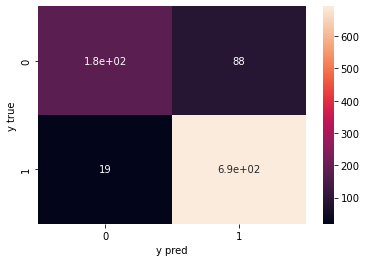

In [45]:
Plot_CFM_HeatMap(y_test['final_result'].map({2: 1, 1:0, 0 : 1}),y_pred,classification_table_binary)

## Neural Networks

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from keras.utils.vis_utils import plot_model

In [47]:
def Plot_History(history,epoch):
    loss = history.history['loss']
    loss_val = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    acc = history.history['accuracy']
    epochs = range(1,epoch+1)
    plt.plot(epochs, loss, c ='g', label='Loss')
    plt.plot(epochs, loss_val, c = 'b', label='Validation loss')
    plt.plot(epochs, val_acc, c = 'orange', label='Validation accuracy')
    plt.plot(epochs, acc, c = 'red', label='Accuracy')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [48]:
#Defining early stop parameters
early_stop=EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

## Pass or Fail Prediction ( Binary Classification )

In [49]:
print(classification_table)

{'Pass': 2, 'Fail': 1, 'Distinction': 0}


In [50]:
# Pass and Distinction goes to Pass (1) Class
# Fail and Withdrawn goes to Fail (0) Class  
new_y_test = y_test['final_result'].map({2: 1, 1:0, 0 : 1})
new_y_train = y_train['final_result'].map({2: 1, 1:0, 0 : 1})

In [51]:
#Artificial neural network ,defining its layers
ANN = Sequential()
ANN.add(Dense(10, activation = 'relu', input_dim = 4 )  )
ANN.add(Dense(7, activation = 'relu'))
ANN.add(Dense(4, activation = 'relu'))
ANN.add(Dense(1, activation = 'sigmoid'))
ANN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history1 = ANN.fit(X_train, new_y_train, batch_size = 10, epochs = 2000,callbacks=[early_stop],validation_data=(X_test,new_y_test))

Epoch 1/2000
228/228 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7429 - val_loss: 0.4998 - val_accuracy: 0.7270
Epoch 2/2000
228/228 [==============================] - 0s 820us/step - loss: 0.4074 - accuracy: 0.8109 - val_loss: 0.3552 - val_accuracy: 0.8701
Epoch 3/2000
228/228 [==============================] - 0s 820us/step - loss: 0.3050 - accuracy: 0.8991 - val_loss: 0.2984 - val_accuracy: 0.8865
Epoch 4/2000
228/228 [==============================] - 0s 811us/step - loss: 0.2700 - accuracy: 0.9043 - val_loss: 0.2905 - val_accuracy: 0.8814
Epoch 5/2000
228/228 [==============================] - 0s 807us/step - loss: 0.2663 - accuracy: 0.9057 - val_loss: 0.2792 - val_accuracy: 0.8906
Epoch 6/2000
228/228 [==============================] - 0s 811us/step - loss: 0.2624 - accuracy: 0.9026 - val_loss: 0.2776 - val_accuracy: 0.8916
Epoch 7/2000
228/228 [==============================] - 0s 822us/step - loss: 0.2603 - accuracy: 0.9030 - val_loss: 0.2770 - v

Epoch 57/2000
228/228 [==============================] - 0s 829us/step - loss: 0.2516 - accuracy: 0.9065 - val_loss: 0.2715 - val_accuracy: 0.8937
Epoch 58/2000
228/228 [==============================] - 0s 820us/step - loss: 0.2499 - accuracy: 0.9114 - val_loss: 0.2720 - val_accuracy: 0.8967
Epoch 59/2000
228/228 [==============================] - 0s 816us/step - loss: 0.2516 - accuracy: 0.9100 - val_loss: 0.2720 - val_accuracy: 0.8926
Epoch 60/2000
228/228 [==============================] - 0s 822us/step - loss: 0.2515 - accuracy: 0.9109 - val_loss: 0.2715 - val_accuracy: 0.8906
Epoch 61/2000
228/228 [==============================] - 0s 816us/step - loss: 0.2503 - accuracy: 0.9105 - val_loss: 0.2799 - val_accuracy: 0.8885
Epoch 62/2000
228/228 [==============================] - 0s 834us/step - loss: 0.2512 - accuracy: 0.9105 - val_loss: 0.2735 - val_accuracy: 0.8947
Epoch 63/2000
228/228 [==============================] - 0s 897us/step - loss: 0.2520 - accuracy: 0.9074 - val_loss: 0

228/228 [==============================] - 0s 803us/step - loss: 0.2513 - accuracy: 0.9074 - val_loss: 0.2831 - val_accuracy: 0.8906
Epoch 113/2000
228/228 [==============================] - 0s 816us/step - loss: 0.2509 - accuracy: 0.9092 - val_loss: 0.2719 - val_accuracy: 0.8967
Epoch 114/2000
228/228 [==============================] - 0s 813us/step - loss: 0.2518 - accuracy: 0.9096 - val_loss: 0.2707 - val_accuracy: 0.8926
Epoch 115/2000
228/228 [==============================] - 0s 816us/step - loss: 0.2493 - accuracy: 0.9087 - val_loss: 0.2715 - val_accuracy: 0.8978
Epoch 116/2000
228/228 [==============================] - 0s 829us/step - loss: 0.2491 - accuracy: 0.9079 - val_loss: 0.2722 - val_accuracy: 0.8978
Epoch 117/2000
228/228 [==============================] - 0s 820us/step - loss: 0.2505 - accuracy: 0.9100 - val_loss: 0.2743 - val_accuracy: 0.8988
Epoch 118/2000
228/228 [==============================] - 0s 811us/step - loss: 0.2505 - accuracy: 0.9100 - val_loss: 0.2716 - 

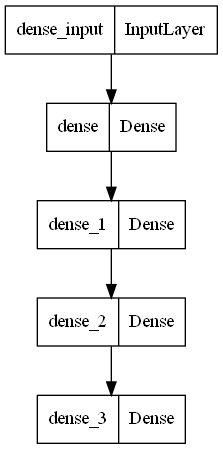

In [52]:
plot_model(ANN)

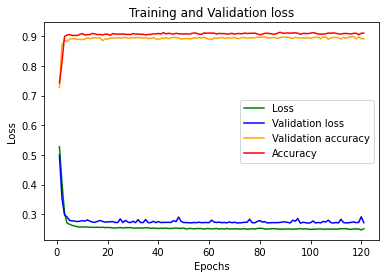

In [55]:
Plot_History(history1,121)

In [54]:
#ANN accuracy
y_pred = ANN.predict(X_test)
y_pred = (y_pred > 0.5)
print(round(accuracy_score(new_y_test, y_pred.ravel()),2))
print(confusion_matrix(new_y_test,y_pred))
print('\n')
print(classification_report(new_y_test,y_pred))

31/31 [==============================] - 0s 467us/step
0.89
[[181  86]
 [ 20 691]]


              precision    recall  f1-score   support

           0       0.90      0.68      0.77       267
           1       0.89      0.97      0.93       711

    accuracy                           0.89       978
   macro avg       0.89      0.82      0.85       978
weighted avg       0.89      0.89      0.89       978



## Pass / Fail / Distinction Prediction ( Multi Class Classification )

In [56]:
#Splitting TRAIN and TEST data
new_y_M = to_categorical(y)
X_train_M,X_test_M,new_y_train_M,new_y_test_M = train_test_split(X,new_y_M,test_size =0.3)

In [57]:
#Artificial neural network ,defining its layers
ANN_M = Sequential()
ANN_M.add(Dense(5, activation = 'relu',input_dim = 4))
ANN_M.add(Dense(4, activation = 'relu'))
ANN_M.add(Dense(3, activation = 'softmax'))
ANN_M.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history2 = ANN_M.fit(X_train_M,new_y_train_M,epochs=1000, batch_size=10,callbacks=[early_stop],validation_data=(X_test_M,new_y_test_M))

Epoch 1/1000
228/228 [==============================] - 1s 1ms/step - loss: 0.9308 - accuracy: 0.6226 - val_loss: 0.8639 - val_accuracy: 0.6237
Epoch 2/1000
228/228 [==============================] - 0s 776us/step - loss: 0.8483 - accuracy: 0.6226 - val_loss: 0.8264 - val_accuracy: 0.6237
Epoch 3/1000
228/228 [==============================] - 0s 767us/step - loss: 0.8097 - accuracy: 0.6415 - val_loss: 0.7762 - val_accuracy: 0.6881
Epoch 4/1000
228/228 [==============================] - 0s 767us/step - loss: 0.7290 - accuracy: 0.7565 - val_loss: 0.6915 - val_accuracy: 0.7679
Epoch 5/1000
228/228 [==============================] - 0s 776us/step - loss: 0.6685 - accuracy: 0.7727 - val_loss: 0.6468 - val_accuracy: 0.7771
Epoch 6/1000
228/228 [==============================] - 0s 767us/step - loss: 0.6379 - accuracy: 0.7806 - val_loss: 0.6249 - val_accuracy: 0.7812
Epoch 7/1000
228/228 [==============================] - 0s 763us/step - loss: 0.6191 - accuracy: 0.7819 - val_loss: 0.6096 - v

Epoch 57/1000
228/228 [==============================] - 0s 772us/step - loss: 0.4959 - accuracy: 0.7907 - val_loss: 0.4943 - val_accuracy: 0.7863
Epoch 58/1000
228/228 [==============================] - 0s 772us/step - loss: 0.4968 - accuracy: 0.7933 - val_loss: 0.4930 - val_accuracy: 0.7853
Epoch 59/1000
228/228 [==============================] - 0s 767us/step - loss: 0.4962 - accuracy: 0.7938 - val_loss: 0.4938 - val_accuracy: 0.7843
Epoch 60/1000
228/228 [==============================] - 0s 772us/step - loss: 0.4965 - accuracy: 0.7942 - val_loss: 0.4965 - val_accuracy: 0.7822
Epoch 61/1000
228/228 [==============================] - 0s 772us/step - loss: 0.4960 - accuracy: 0.7916 - val_loss: 0.4941 - val_accuracy: 0.7863
Epoch 62/1000
228/228 [==============================] - 0s 763us/step - loss: 0.4959 - accuracy: 0.7951 - val_loss: 0.4991 - val_accuracy: 0.7853
Epoch 63/1000
228/228 [==============================] - 0s 780us/step - loss: 0.4957 - accuracy: 0.7942 - val_loss: 0

228/228 [==============================] - 0s 763us/step - loss: 0.4943 - accuracy: 0.7920 - val_loss: 0.4900 - val_accuracy: 0.7853
Epoch 113/1000
228/228 [==============================] - 0s 789us/step - loss: 0.4929 - accuracy: 0.7885 - val_loss: 0.4959 - val_accuracy: 0.7832
Epoch 114/1000
228/228 [==============================] - 0s 772us/step - loss: 0.4927 - accuracy: 0.7933 - val_loss: 0.4936 - val_accuracy: 0.7843
Epoch 115/1000
228/228 [==============================] - 0s 776us/step - loss: 0.4928 - accuracy: 0.7946 - val_loss: 0.4895 - val_accuracy: 0.7945
Epoch 116/1000
228/228 [==============================] - 0s 763us/step - loss: 0.4922 - accuracy: 0.7951 - val_loss: 0.4946 - val_accuracy: 0.7832
Epoch 117/1000
228/228 [==============================] - 0s 763us/step - loss: 0.4927 - accuracy: 0.7946 - val_loss: 0.4898 - val_accuracy: 0.7863
Epoch 118/1000
228/228 [==============================] - 0s 776us/step - loss: 0.4913 - accuracy: 0.7942 - val_loss: 0.4893 - 

228/228 [==============================] - 0s 798us/step - loss: 0.4891 - accuracy: 0.7964 - val_loss: 0.4912 - val_accuracy: 0.7832
Epoch 168/1000
228/228 [==============================] - 0s 763us/step - loss: 0.4907 - accuracy: 0.7968 - val_loss: 0.4878 - val_accuracy: 0.7832
Epoch 169/1000
228/228 [==============================] - 0s 780us/step - loss: 0.4897 - accuracy: 0.7938 - val_loss: 0.4866 - val_accuracy: 0.7873
Epoch 170/1000
228/228 [==============================] - 0s 776us/step - loss: 0.4904 - accuracy: 0.7964 - val_loss: 0.4863 - val_accuracy: 0.7986
Epoch 171/1000
228/228 [==============================] - 0s 807us/step - loss: 0.4909 - accuracy: 0.7986 - val_loss: 0.4865 - val_accuracy: 0.7914
Epoch 172/1000
228/228 [==============================] - 0s 789us/step - loss: 0.4897 - accuracy: 0.7925 - val_loss: 0.4888 - val_accuracy: 0.7883
Epoch 173/1000
228/228 [==============================] - 0s 789us/step - loss: 0.4897 - accuracy: 0.7982 - val_loss: 0.4892 - 

228/228 [==============================] - 0s 767us/step - loss: 0.4889 - accuracy: 0.7903 - val_loss: 0.4841 - val_accuracy: 0.7863
Epoch 223/1000
228/228 [==============================] - 0s 772us/step - loss: 0.4866 - accuracy: 0.7951 - val_loss: 0.4859 - val_accuracy: 0.7924
Epoch 224/1000
228/228 [==============================] - 0s 754us/step - loss: 0.4881 - accuracy: 0.7907 - val_loss: 0.4845 - val_accuracy: 0.7894
Epoch 225/1000
228/228 [==============================] - 0s 758us/step - loss: 0.4879 - accuracy: 0.7933 - val_loss: 0.4891 - val_accuracy: 0.7843
Epoch 226/1000
228/228 [==============================] - 0s 754us/step - loss: 0.4883 - accuracy: 0.7929 - val_loss: 0.4852 - val_accuracy: 0.7863
Epoch 227/1000
228/228 [==============================] - 0s 750us/step - loss: 0.4877 - accuracy: 0.7933 - val_loss: 0.4844 - val_accuracy: 0.7894
Epoch 228/1000
228/228 [==============================] - 0s 754us/step - loss: 0.4885 - accuracy: 0.7920 - val_loss: 0.4846 - 

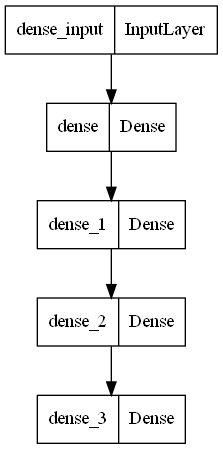

In [59]:
plot_model(ANN)

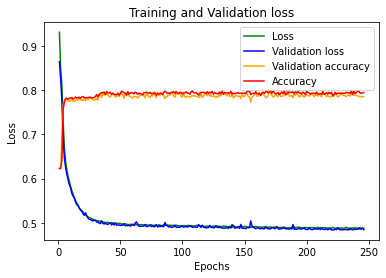

In [60]:
Plot_History(history2,246)

In [61]:
#Accuracy score
y_pred_M = ANN_M.predict(X_test_M)
y_pred_M = y_pred_M > 0.50
print(round(accuracy_score(new_y_test_M,y_pred_M),2))

31/31 [==============================] - 0s 434us/step
0.78


# THE END 